# Consider only the below columns and prepare a prediction model for predicting Price.

## Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
#Importing python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset
toyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## EDA 

In [3]:
#EDA Process
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
#concat useful coloumns
toyo2 = pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
#Renaming Coloumns
toyo3 = toyo2.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyo3.head()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
#Checking Duplicate Values
toyo3[toyo3.duplicated()]

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
#Dropping Duplicates
toyo4 =toyo3.drop_duplicates().reset_index(drop=True)
toyo4

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyo4.describe()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


## Correlation Analysis

In [9]:
toyo4.corr()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


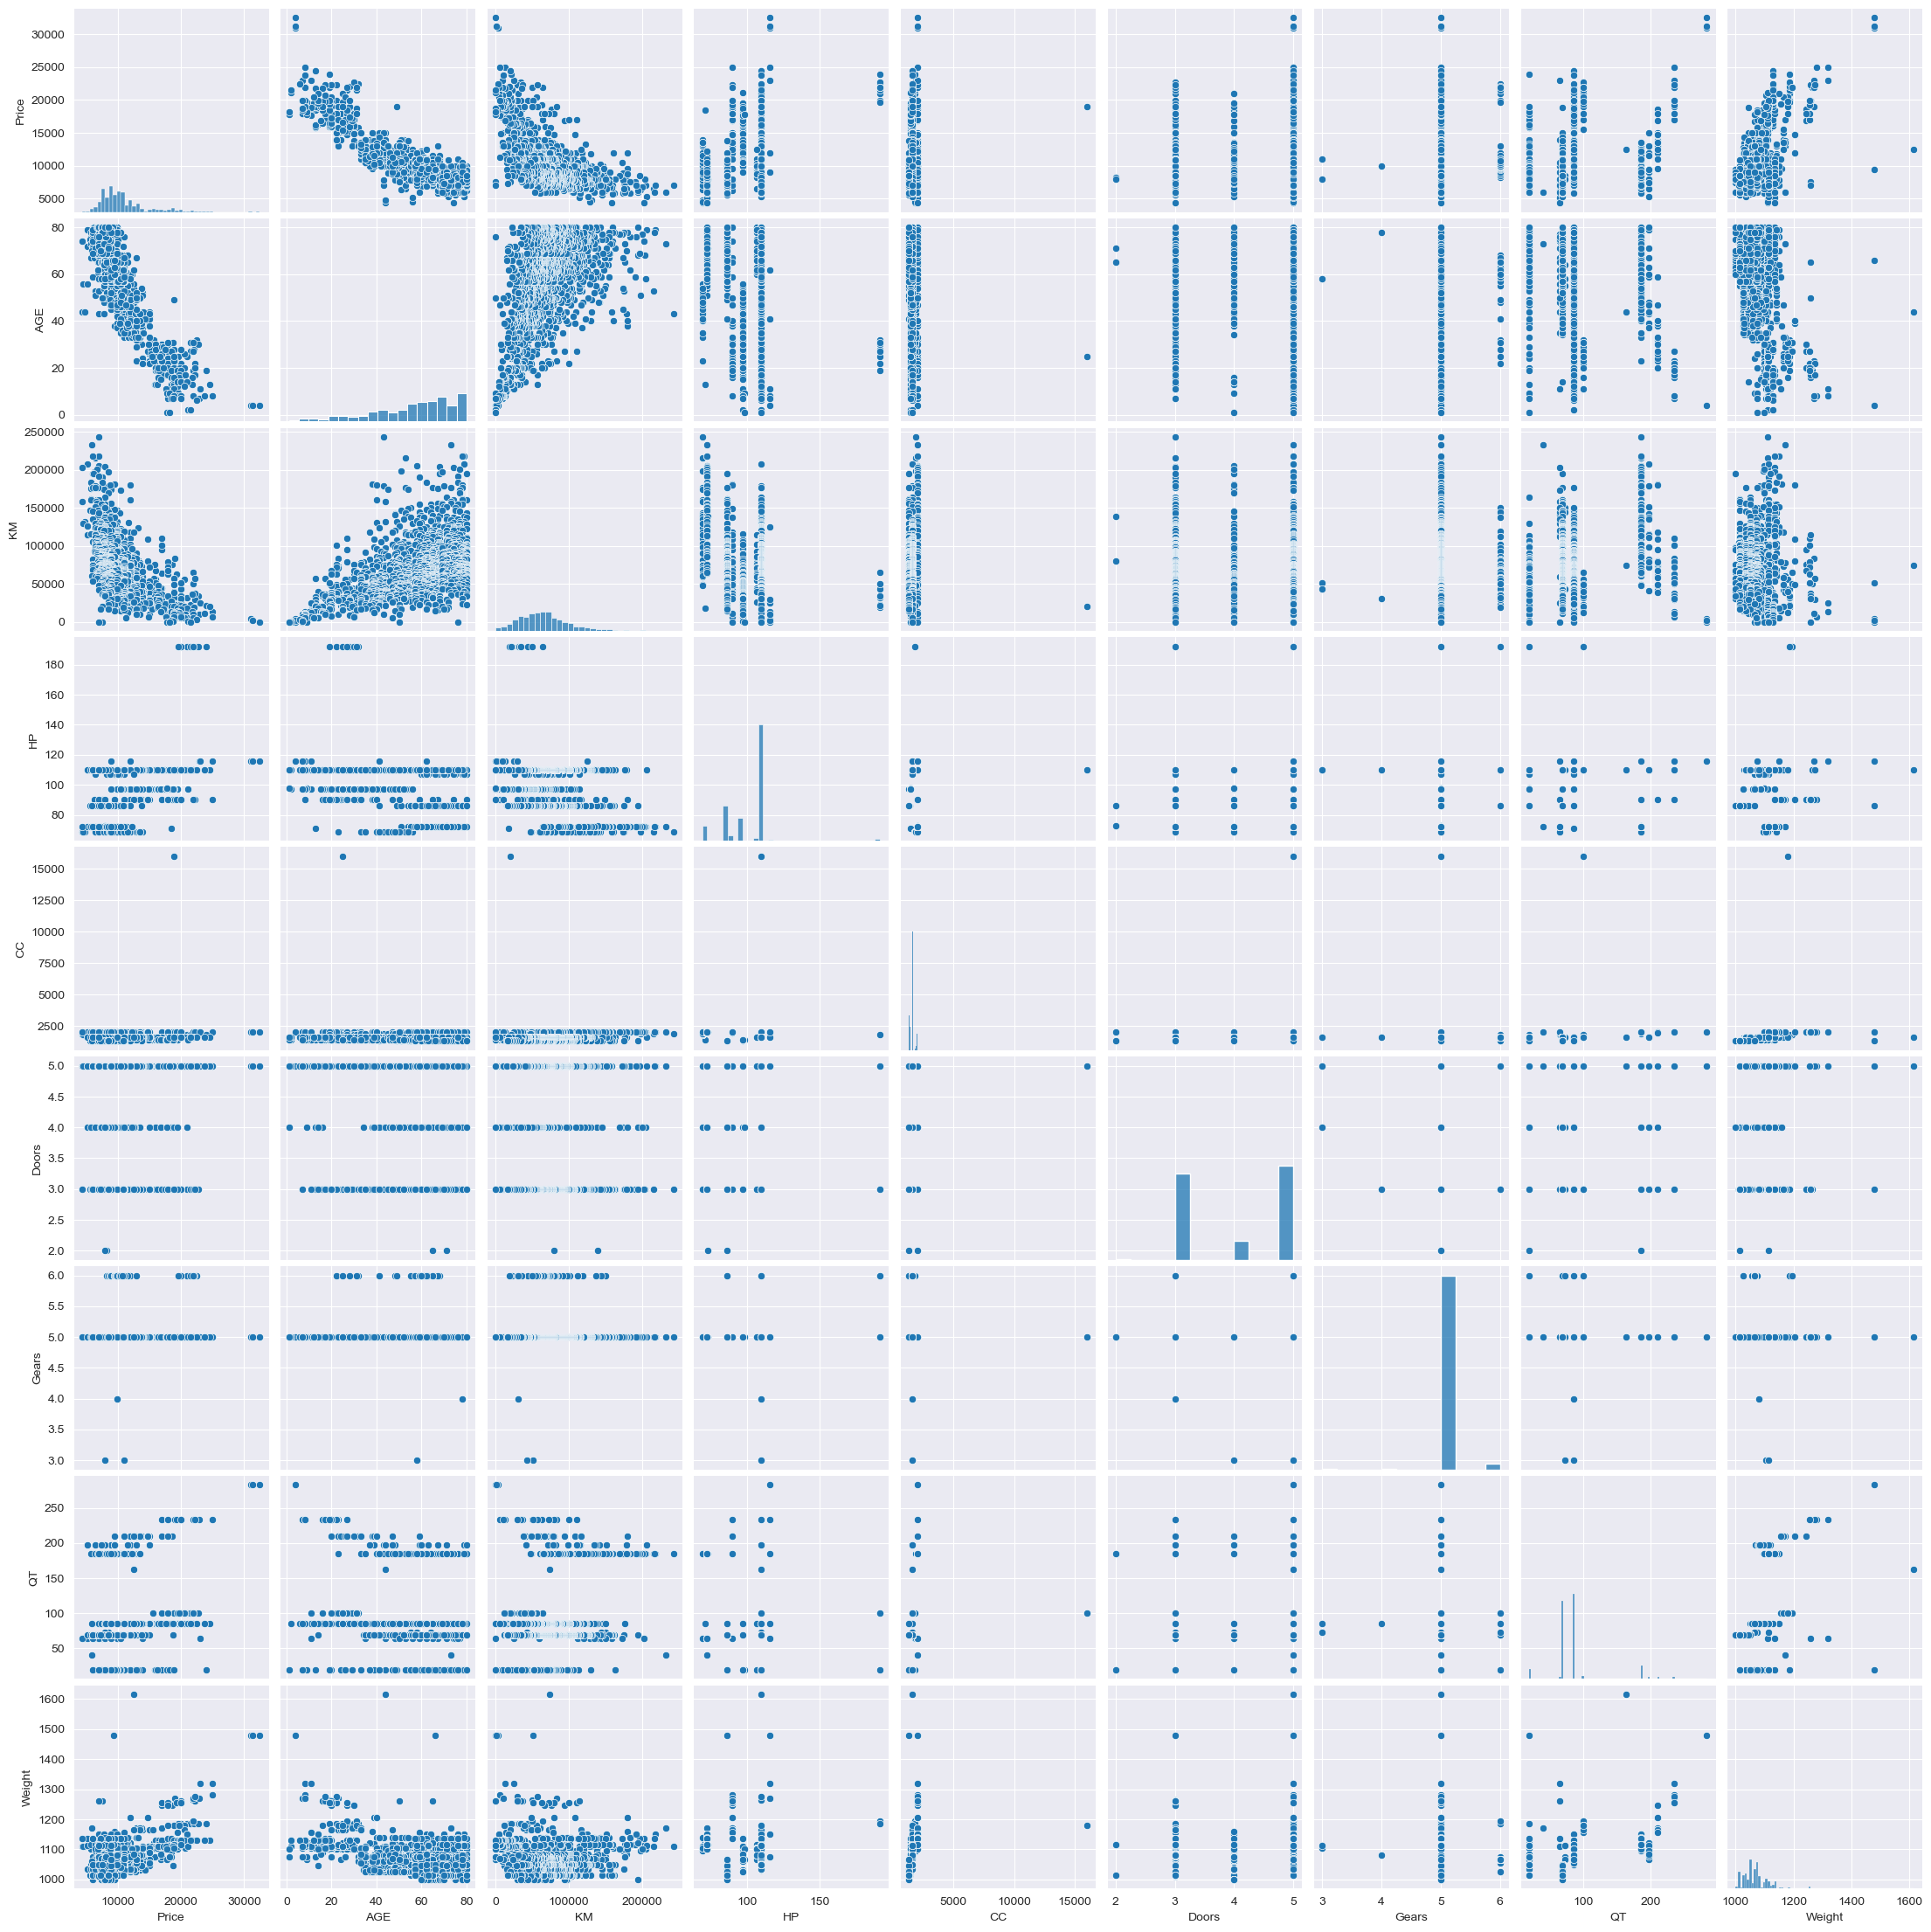

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(toyo4)

## Model Building

In [11]:
model = smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo4).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:04:42   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.params

Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [14]:
print(np.round(model.pvalues,5),np.round(model.tvalues,5))

Intercept    0.00011
AGE          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64 Intercept    -3.87527
AGE         -46.55188
KM          -16.55242
HP           11.20972
CC           -1.31644
Doors        -0.02301
Gears         3.03456
QT            2.94420
Weight       15.76066
dtype: float64


In [15]:
# Finding rsquared values
model.rsquared , model.rsquared_adj   # Model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

#### Model Accuracy is 86 %
#### p values of doors & CC >0.05,Doors & CC are insignificant variables

## Simple Linear Regression Models
#### Build slr and mlr models for insignificant variables ~ Doors and CC

In [17]:
slr_c=smf.ols('Price~CC',data=toyo4).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [18]:
slr_d =smf.ols('Price~Doors',data=toyo4).fit()
slr_d.tvalues , slr_d.pvalues # doors has significant pvalue

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [19]:
mlr_cd =smf.ols('Price~CC+Doors',data=toyo4).fit()
mlr_cd.tvalues , mlr_cd.pvalues # doors & CC has significant pvalue

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation Techniques 

### Two Techniques 
### (1) Collinearity Check
### (2) Residual Analysis

In [29]:
#(1) Collinearity Check
#Calculate VIF = 1/(1-rsquare) for all independent variables

rsq_age = smf.ols('AGE~KM+HP+CC+Doors+Gears+QT+Weight',data = toyo4).fit().rsquared
vif_age = (1/(1-rsq_age))
           
rsq_km = smf.ols('KM~AGE+HP+CC+Doors+Gears+QT+Weight',data = toyo4).fit().rsquared
vif_km = (1/(1-rsq_km))
    
rsq_hp = smf.ols('HP~AGE+KM+CC+Doors+Gears+QT+Weight',data = toyo4).fit().rsquared
vif_hp = (1/(1-rsq_hp))

rsq_cc = smf.ols('CC~AGE+KM+HP+Doors+Gears+QT+Weight',data = toyo4).fit().rsquared
vif_cc = (1/(1-rsq_cc))
          
rsq_d = smf.ols('Doors~AGE+KM+HP+Gears+QT+Weight',data = toyo4).fit().rsquared
vif_d = (1/(1-rsq_d))
         
rsq_g = smf.ols('Gears~AGE+KM+HP+QT+Weight+Doors',data = toyo4).fit().rsquared
vif_g = (1/(1-rsq_g))
         
rsq_qt = smf.ols('QT~AGE+KM+HP+CC+Doors+Gears+Weight',data = toyo4).fit().rsquared
vif_qt = (1/(1-rsq_qt))
          
rsq_wt = smf.ols('Weight~AGE+KM+HP+CC+Doors+Gears+QT',data = toyo4).fit().rsquared
vif_wt = (1/(1-rsq_wt))

#Putting values in a DataFrame

d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_km,vif_hp,vif_cc,vif_d,vif_g,vif_qt,vif_wt]}
vif_df=pd.DataFrame(d1)
vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155585
5,Gears,1.098593
6,QT,2.295375
7,Weight,2.487180


### None variable has VIF>20, No Collinearity, so consider all variables in Regression equation


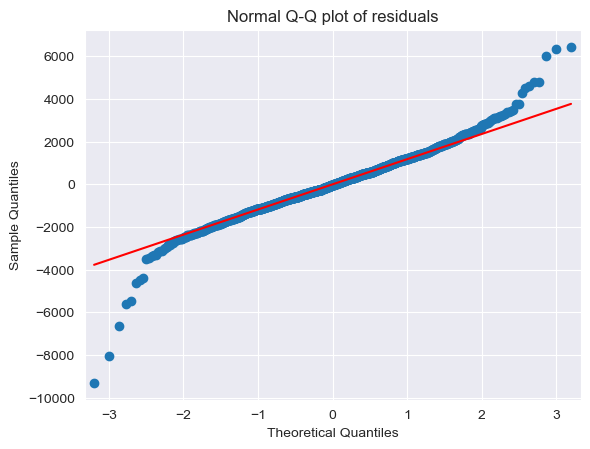

In [32]:
# (2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')# 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()


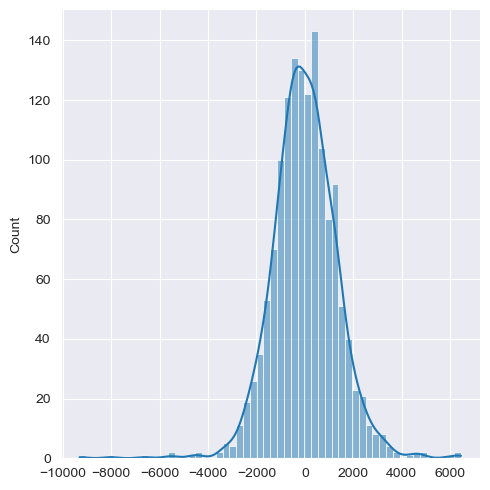

In [37]:
sns.displot(model.resid, kde = True)

In [ ]:
# outlier detection from the above QQ plot & dist plot of residuals

In [34]:
list[np.where(model.resid>6000)] 

list[array([109, 146, 522], dtype=int64)]

In [35]:
list[np.where(model.resid<-6000)]

list[array([220, 600, 959], dtype=int64)]

In [38]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)


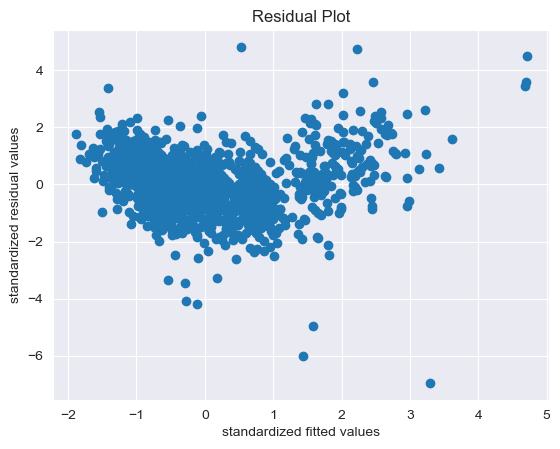

In [41]:
 # User defined z = (x - mu)/sigma
def standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(standardized_values(model.fittedvalues),standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

#### Residual plot shows no homoscadacity or heteroscadasticity

# Model Deletion Diagnostics

#### Detecting Influencers or outliers


## Cook's Distance

In [54]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
print(c)

[7.22221054e-03 3.94547973e-03 5.44224039e-03 ... 8.04110550e-07
 6.99854767e-04 1.08408002e-02]


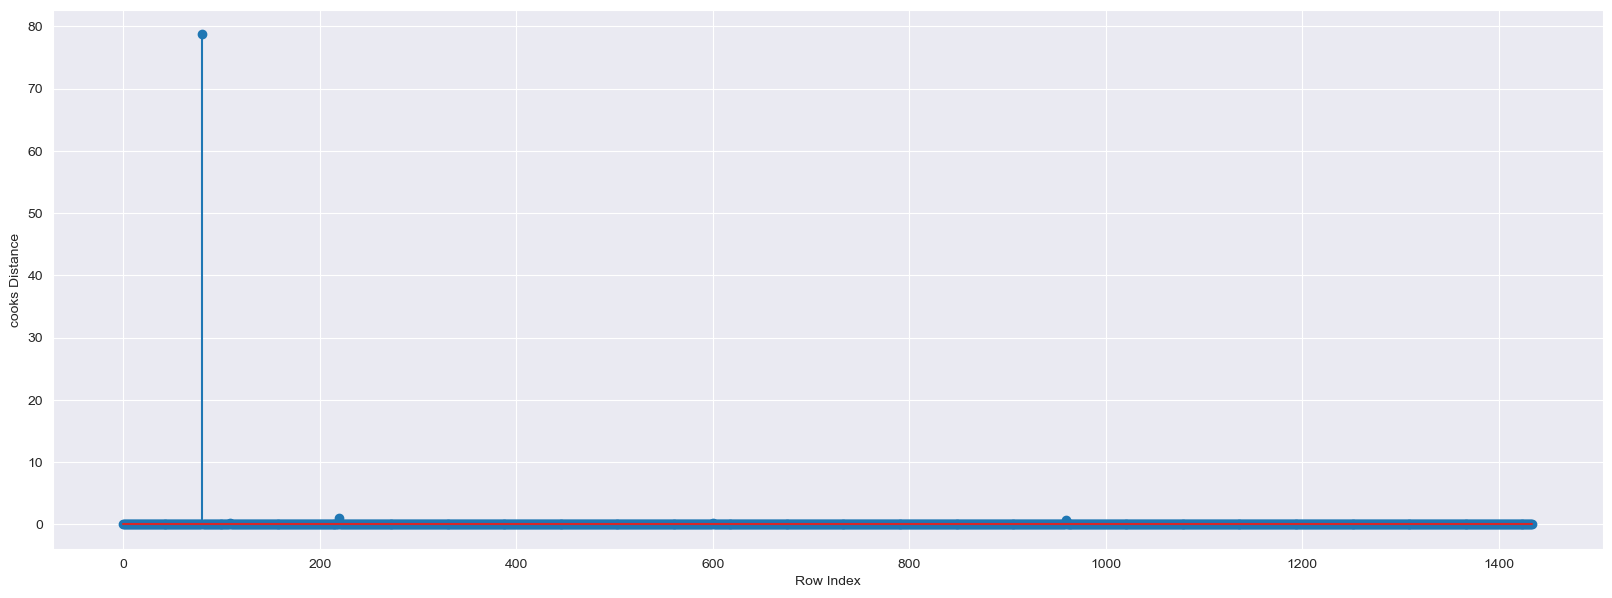

In [52]:
#Plot cooks Distance using Stem plot

fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(toyo4)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("cooks Distance")
plt.show()


In [107]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(598, 0.3168903540145306)

#Since the value is <1 , we can stop the diagnostic process and finalize the model.

In [60]:
toyo4.shape

(1435, 9)

In [ ]:
#Leverage 

In [58]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo4.shape[1]
n=toyo4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

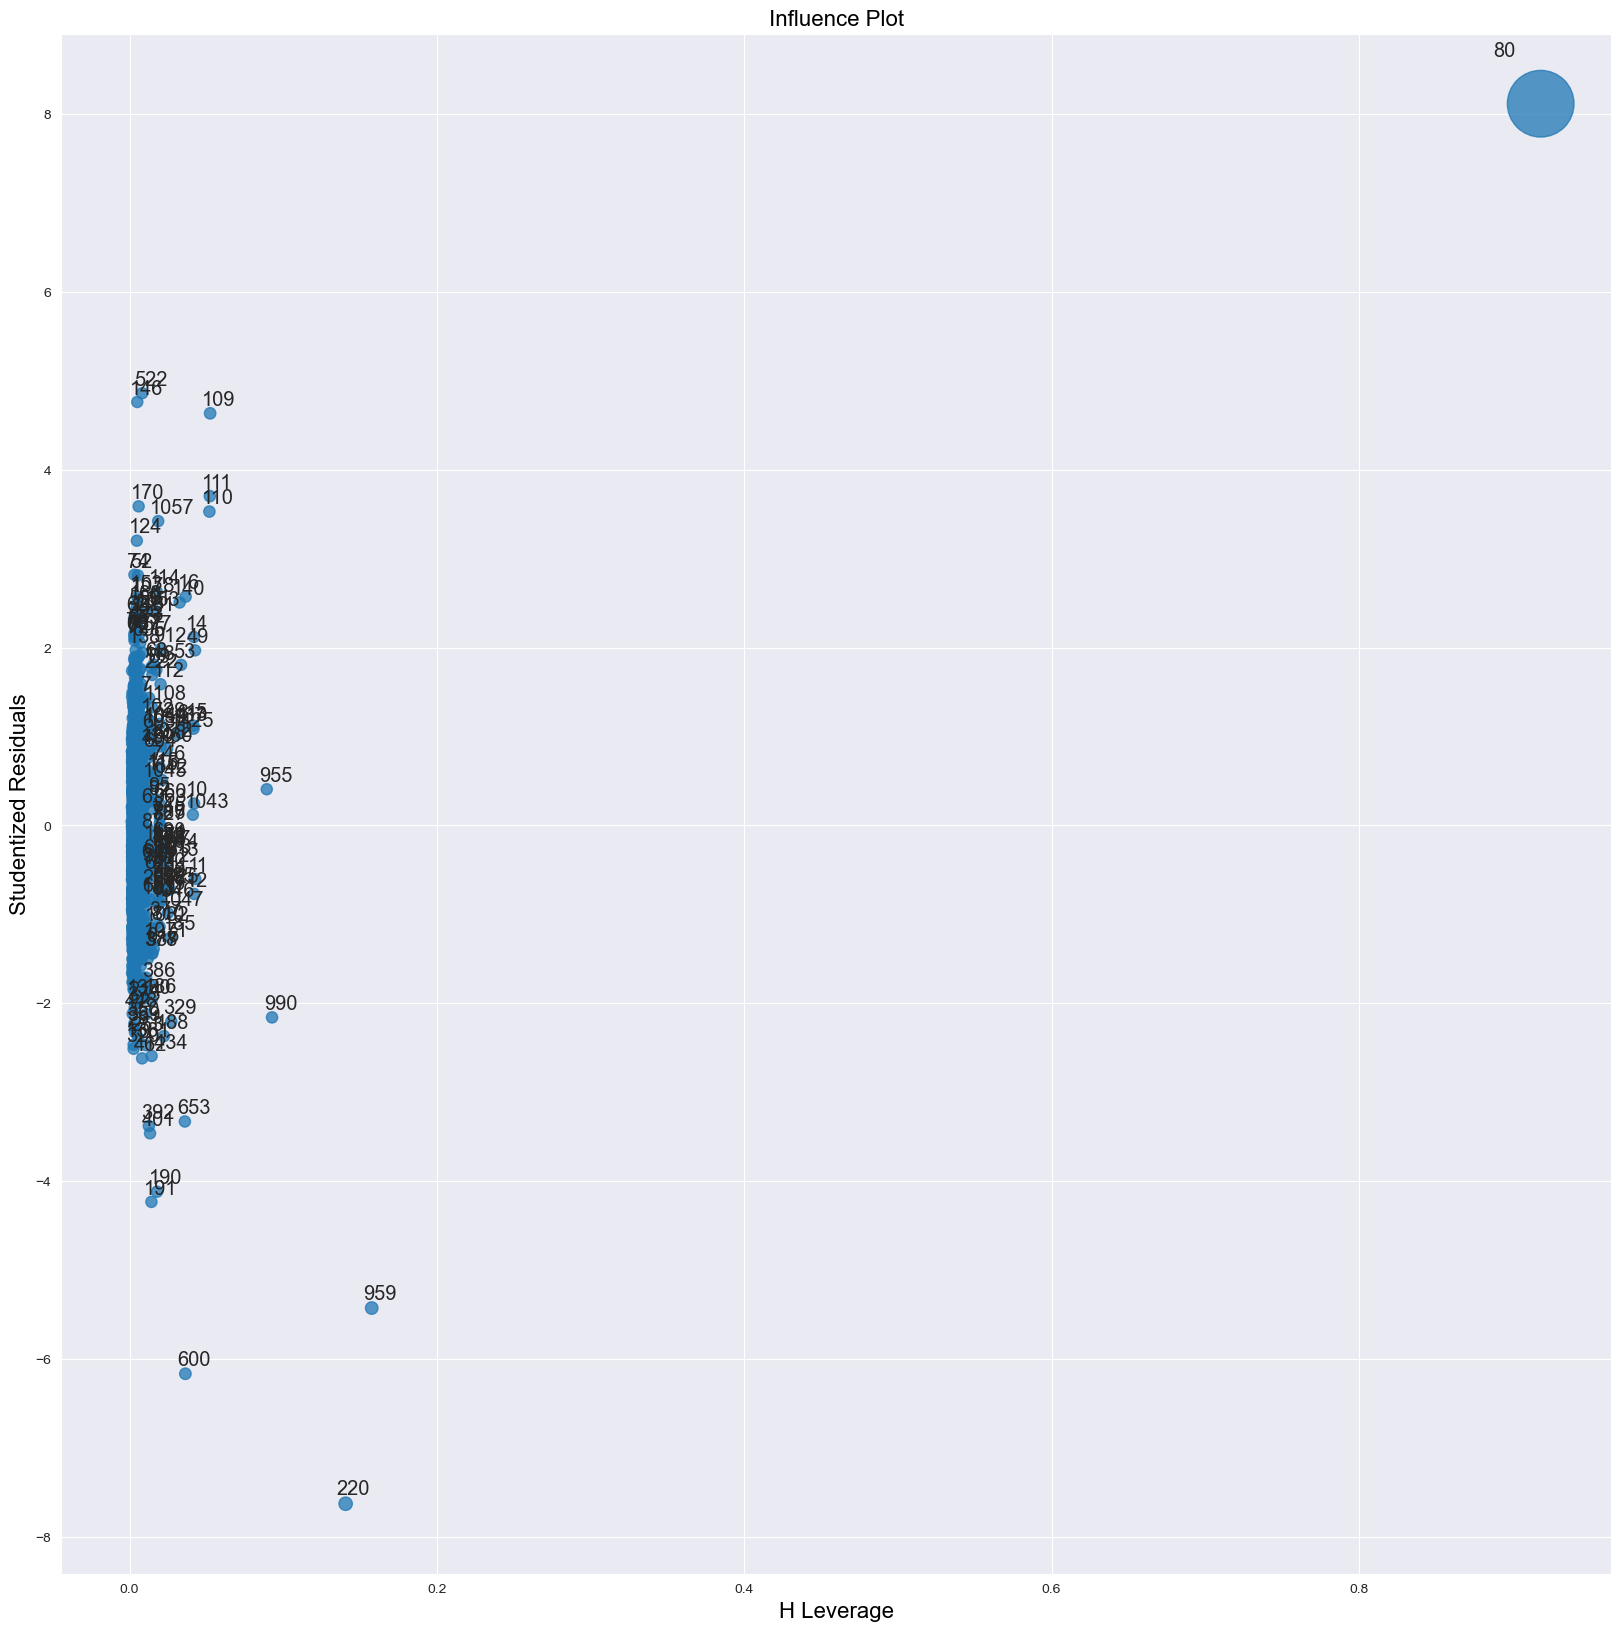

In [63]:
#Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [64]:
#datapoint 80 is an outlier

In [69]:
toyo4[toyo4.index.isin([80])]

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model

In [79]:
#Create a copy of the model

toyo_new =toyo4.copy()
toyo_new

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [80]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo5 = toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo5

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [93]:
model_1=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=toyo5).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:55:51   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
AGE         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
#The accuracy improved to 86.75%
#doors P value shows the variable is insignificant,trying MLR without doors variable & Checking model performance

In [94]:
model_2=smf.ols('Price~AGE+KM+HP+CC+Gears+QT+Weight',data=toyo5).fit()
model_2.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1340.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:56:05   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1426   BIC:                         2.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6225.7366   1383.114     -4.501      0.000   -8938.893   -3512.581
AGE         -120.5104      2.561    -47.058      0.000    -125.534    -115.487
KM            -0.0178      0.001    -13.986      0.000      -0.020      -0.015
HP            39.0416      2.899     13.468      0.000      33.355      44.728
CC            -2.4918      0.306     -8.135      0.000      -3.093      -1.891
Gears        552.2590    189.176      2.919      0.004     181.166     923.352
QT             8.9718      1.426      6.293      0.000       6.175      11.768
Weight        19.8642      1.079     18.417      0.000      17.748      21.980
==============================================================================
Omnibus:                      235.248   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2493.347
Skew:                          -0.409   Prob(JB):                         0.00
Kurtosis:                       9.408   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#Removing doors coloumn has not improved the model since it is insignificant.

## Model Predictions

In [98]:
new_data=pd.DataFrame({'AGE':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [99]:
# Manual Prediction of Price
model_1.predict(new_data)

0    14970.556739
dtype: float64

In [102]:
# Automatic Prediction of Price 
pred_y=final_model.predict(toyo5)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64

In [108]:
predicted =pd.DataFrame()
predicted['Predicted_Price']= pred_y
predicted['Actual Price'] = toyo5["Price"]
predicted

,Predicted_Price,Actual Price
0,16513.565909,13500
1,16051.656226,13750
2,16486.949796,13950
3,16133.995128,14950
4,15921.372341,13750
...,...,...
1429,8970.611964,7500
1430,8435.944671,10845
1431,8591.765915,8500
1432,8714.053275,7250


In [109]:
# Estimation of mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(toyo5["Price"], pred_y)

1711281.8443644722